<a href="https://colab.research.google.com/github/Madhu-271005/My-Projects/blob/main/Netflix_User_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/netflix_users.csv")
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre
0,1,James Martinez,18.0,France,Premium,80.26,Drama
1,2,John Miller,23.0,USA,Premium,321.75,Sci-Fi
2,3,Emma Davis,60.0,UK,Basic,35.89,Comedy
3,4,Emma Miller,44.0,USA,Premium,261.56,Documentary
4,5,Jane Smith,68.0,USA,Standard,909.30,Drama


In [ ]:
df.tail()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre
24995,24996,David Miller,18.0,Australia,Premium,183.88,Horror
24996,24997,Jane Miller,17.0,USA,Premium,112.37,Drama
24997,24998,Sarah Miller,14.0,USA,Premium,351.80,Action
24998,24999,Michael Williams,71.0,USA,Basic,655.89,Action
24999,25000,James Jones,19.0,Germany,Premium,207.06,Documentary


In [ ]:
print(df.shape)

(25000, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               24990 non-null  object 
 2   Age                24989 non-null  float64
 3   Country            24991 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   24998 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,User_ID,Age,Watch_Time_Hours
count,25000.000000,24989.000000,24998.000000
mean,12500.500000,46.484053,500.458984
std,7217.022701,19.594485,286.390698
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.542500
50%,12500.500000,46.000000,501.495000
75%,18750.250000,63.000000,745.737500
max,25000.000000,80.000000,999.990000


In [ ]:
df1=df.copy(deep=True)

In [ ]:
df.isna().sum()

,0
User_ID,0
Name,10
Age,11
Country,9
Subscription_Type,0
Watch_Time_Hours,2
Favorite_Genre,0


In [ ]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)
df1.isna().sum()

,0
User_ID,0
Name,10
Age,0
Country,9
Subscription_Type,0
Watch_Time_Hours,2
Favorite_Genre,0


In [ ]:
me=df1["Watch_Time_Hours"].mean()
df1["Watch_Time_Hours"]=df1["Watch_Time_Hours"].fillna(me)
df1.isna().sum()

,0
User_ID,0
Name,10
Age,0
Country,9
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0


In [ ]:
df1["Subscription_Type"].fillna("Basic",inplace=True)
df1.isna().sum()

/tmp/ipython-input-10-2971476075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Subscription_Type"].fillna("Basic",inplace=True)


,0
User_ID,0
Name,10
Age,0
Country,9
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0


In [ ]:
df1.dropna(inplace=True)
df1.isna().sum()

,0
User_ID,0
Name,0
Age,0
Country,0
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0


In [ ]:
df1["Subscription_Type"].value_counts()

,count
Subscription_Type,
Premium,8395
Basic,8350
Standard,8236


In [ ]:
df1["Favorite_Genre"].value_counts()

,count
Favorite_Genre,
Horror,3654
Documentary,3632
Action,3585
Romance,3570
Comedy,3558
Drama,3529
Sci-Fi,3453


In [ ]:
df1["Country"].value_counts()

,count
Country,
UK,2591
Germany,2545
Brazil,2503
India,2502
USA,2501
Canada,2489
Mexico,2489
France,2470
Japan,2454


In [ ]:
mapping={"Basic":100,"Standard":200,"Premium":300}
df1["Subscription_Type"]=df1["Subscription_Type"].map(mapping)
df1.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre
0,1,James Martinez,18.0,France,300,80.26,Drama
1,2,John Miller,23.0,USA,300,321.75,Sci-Fi
2,3,Emma Davis,60.0,UK,100,35.89,Comedy
3,4,Emma Miller,44.0,USA,300,261.56,Documentary
4,5,Jane Smith,68.0,USA,200,909.30,Drama


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=["Country","Favorite_Genre"]
for i in cols:
  df1[i]=le.fit_transform(df1[i])
df1.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre
0,1,James Martinez,18.0,3,300,80.26,3
1,2,John Miller,23.0,9,300,321.75,6
2,3,Emma Davis,60.0,8,100,35.89,1
3,4,Emma Miller,44.0,9,300,261.56,2
4,5,Jane Smith,68.0,9,200,909.30,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
a=df1.loc[0:25000,"Subscription_Type":"Watch_Time_Hours"]
mms=MinMaxScaler(feature_range=(0,100))
x_scaled=mms.fit_transform(a)
x_scaled

array([[100.        ,   8.01504196],
       [100.        ,  32.16718173],
       [  0.        ,   3.57746507],
       ...,
       [100.        ,  35.17257243],
       [  0.        ,  65.58552612],
       [100.        ,  20.69669057]])

In [ ]:
x=df1[["Age","Country","Watch_Time_Hours","Favorite_Genre"]]
y=df1.Subscription_Type

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
ypred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.33660196117670604


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier()

In [ ]:
ypred=dtc.predict(x)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,ypred)

array([[8350,    0,    0],
       [  17, 8219,    0],
       [  12,    4, 8379]])

In [ ]:
from sklearn.svm import LinearSVC, SVC
svc_lin = SVC(kernel="linear").fit(x, y)
rbf_svc = SVC(kernel="rbf").fit(x, y)
poly_svc3 = SVC(kernel="poly", degree=3).fit(x, y)
poly_svc4 = SVC(kernel="poly", degree=4).fit(x, y)
print("Linear:", svc_lin.score(x, y))
print("RBF:", rbf_svc.score(x, y))
print("Poly3:", poly_svc3.score(x, y))
print("Poly4:", poly_svc4.score(x, y))

[Text(0.8805026030751718, 0.9931506849315068, 'Country <= 997.495\ngini = 0.667\nsamples = 24981\nvalue = [8350, 8236, 8395]\nclass = Standard'),
 Text(0.7909148176436209, 0.9794520547945206, 'Country <= 0.38\ngini = 0.667\nsamples = 24907\nvalue = [8326, 8223, 8358]\nclass = Standard'),
 Text(0.8357087103593963, 0.9863013698630136, 'True  '),
 Text(0.7386432136226864, 0.9657534246575342, 'Age <= 42.5\ngini = 0.42\nsamples = 10\nvalue = [0, 7, 3]\nclass = Basic'),
 Text(0.7384371641023363, 0.952054794520548, 'Country <= 0.3\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Basic'),
 Text(0.7383341393421613, 0.9383561643835616, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Basic'),
 Text(0.7385401888625114, 0.9383561643835616, 'Age <= 31.5\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = Basic'),
 Text(0.7384371641023363, 0.9246575342465754, 'Country <= 0.335\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Basic'),
 Text(0.7383341393421613, 0.910958904109589, 'gin

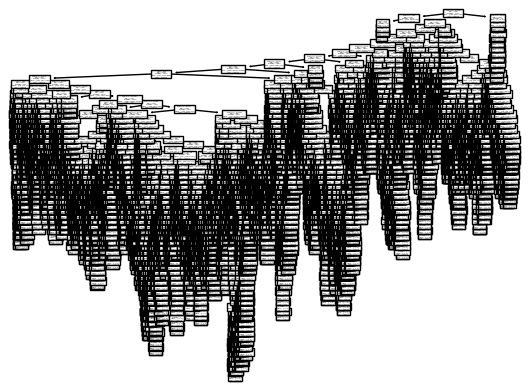

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc,feature_names=["Age","Country","Watch_Time_Hours","Favorite_Genre"],class_names=["Premium","Basic","Standard"])